<a href="https://colab.research.google.com/github/djuanthomas22/My-new-repo/blob/main/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Project Overview
# This project uses a supervised regression model to predict house prices based on numerical features.
#The goal is to understand how input features relate to housing prices and evaluate model performance using Root Mean Squared Error.


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression


In [6]:
my_house_data = pd.read_csv("/content/kc_house_data 3 (1).csv")
# set my target feature/
my_house_label = 'price'
# Select a specific colum from your DataFrame
my_house_series = my_house_data[my_house_label]

In [7]:
my_house_series

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [8]:
# Drop one or more columns from your dataframe that you feel like would not be useful for the model
my_house_data = pd.read_csv("/content/kc_house_data 3 (1).csv").drop(columns = ['date','id']).dropna()

In [9]:
x = my_house_data.drop(columns = ['price'])
y = my_house_data['price']

In [10]:
# Split data to evaluate model performance on unseen data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
# Model Selection
# A linear regression model was selected as a baseline to understand linear relationships between features and housing prices.
model = LinearRegression()

In [12]:
model.fit(x_train, y_train)

LinearRegression()

In [13]:
predicitons = model.predict(x_test)

In [14]:
predicitons

array([ 475404.44211087, 1367232.22323638,  517405.76986478, ...,
        489821.07773651,  496644.0873315 ,  531919.96033279])

In [15]:
from matplotlib import pyplot as plt
import numpy as np

/tmp/ipython-input-2579320260.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


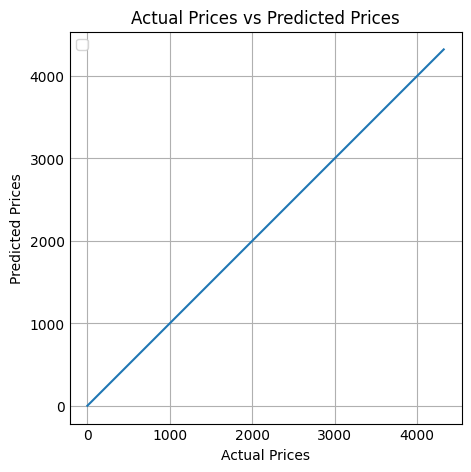

In [23]:
# Create a vizitualization of actual vs predicted prices.
plt.figure(figsize = (4,4))
plt.plot(range(len(y)))
plt.style.use('_mpl-gallery')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [17]:
x = range(0,len(predicitons))
y = x

In [16]:
# Actual values
actual = y_test.values
# Predicted values
predicted = predicitons
# Sort the values
sorted_idx = np.argsort(actual)
actual_sorted = actual[sorted_idx]
predicitons_sorted = predicted[sorted_idx]

/tmp/ipython-input-76166260.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


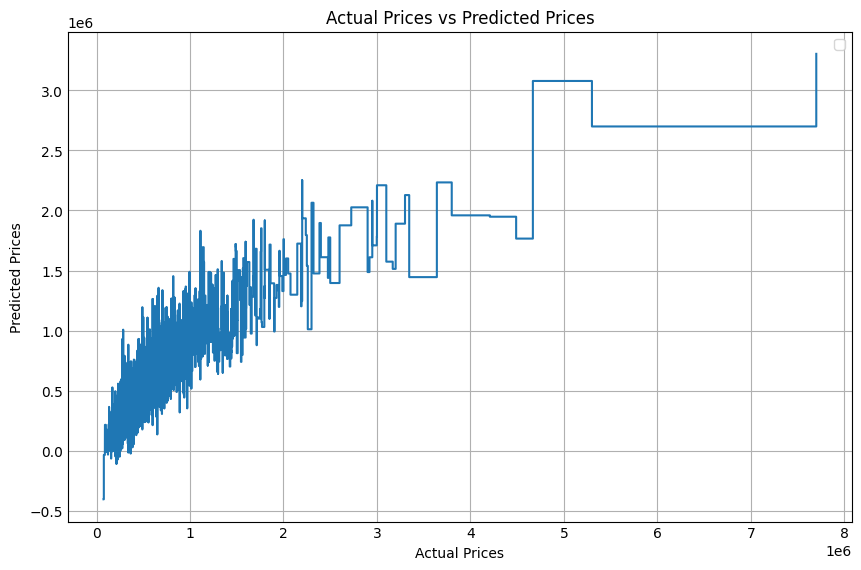

In [30]:
# Based on this graph we can see that predicted prices seem to be lower than they should be when it comes to higher prices
plt.figure(figsize = (8,5))
plt.step(actual_sorted, predicitons_sorted, where='post')
plt.style.use('_mpl-gallery')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import root_mean_squared_error

In [20]:
# Model Evaluation
# Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE).
# The same type of error, but RMSE converts it back into the original units of the target variable.
# Lower values indicate better model performance.

root_mean_squared_error(y_test, predicitons)

210627.24899682956